<a href="https://colab.research.google.com/github/henriquedezani/fatec-lp3-ml-titanic/blob/main/FATEC_Rio_Preto_LP3_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

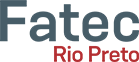

### **Curso Superior de Tecnologia em Informática para Negócios**
### Linguagem de Programação III
#### Prof. Dr. Henrique Dezani
[dezani@fatecriopreto.edu.br](mailto:dezani@fatecriopreto.edu.br)

# Classificação

Titanic


In [36]:
import pandas as pd

In [37]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/henriquedezani/fatec-lp3-ml-titanic/main/dataset/train.csv')

In [38]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
dataframe.shape

(891, 12)

In [40]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
mulheres = dataframe.loc[dataframe.Sex == 'female']['Survived']

In [43]:
mulheres.tail()

880    1
882    0
885    0
887    1
888    0
Name: Survived, dtype: int64

In [44]:
sum(mulheres)

233

In [45]:
len(mulheres)

314

In [46]:
mulheres_sobreviventes = sum(mulheres)/len(mulheres)
mulheres_sobreviventes

0.7420382165605095

In [47]:
mulheres.shape

(314,)

In [48]:
# PANDAS LOC e ILOC
homens = dataframe.loc[dataframe.Sex == 'male']['Survived']
homens_sobreviventes = sum(homens)/len(homens)
homens_sobreviventes

0.18890814558058924

In [49]:
dataframe['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

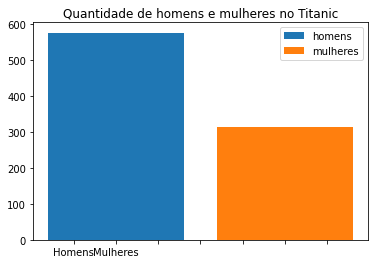

In [50]:
# MATPLOTLIB
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(1, len(homens), label='homens')
ax.bar(2, len(mulheres), label='mulheres')
ax.legend()
ax.set_title('Quantidade de homens e mulheres no Titanic')
ax.set_xticklabels(['','Homens', 'Mulheres'])
plt.show()

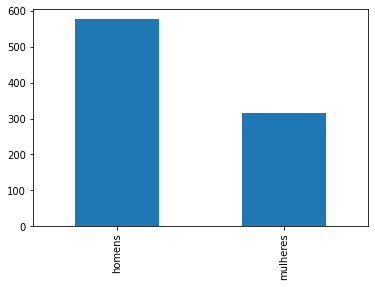

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

data = pd.Series([len(homens), len(mulheres)], index=['homens', 'mulheres'])
data.plot.bar()
plt.show()

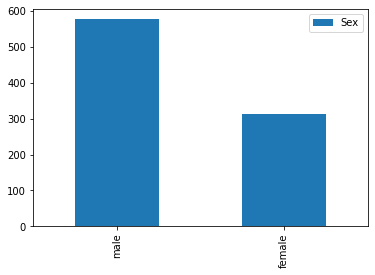

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dataframe['Sex'].value_counts().plot.bar()
plt.legend()
plt.show()

In [53]:
data

homens      577
mulheres    314
dtype: int64

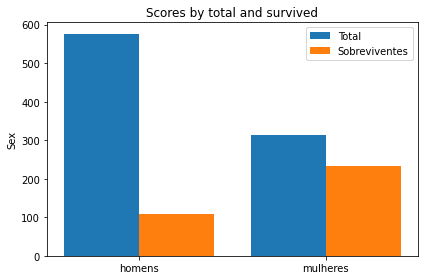

In [54]:
import numpy as np

total = [len(homens), len(mulheres)]
sobreviventes = [sum(homens), sum(mulheres)]

labels = ['homens', 'mulheres']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total, width, label='Total')
rects2 = ax.bar(x + width/2, sobreviventes, width, label='Sobreviventes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sex')
ax.set_title('Scores by total and survived')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [55]:
dic = {'total': [len(homens), len(mulheres)], 'sobreviventes': [sum(homens), sum(mulheres)]}

In [56]:
dic

{'sobreviventes': [109, 233], 'total': [577, 314]}

In [57]:
df = pd.DataFrame(dic, index=['homens', 'mulheres'])

In [58]:
df

,total,sobreviventes
homens,577,109
mulheres,314,233


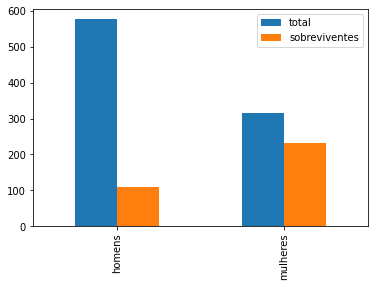

In [59]:
df.plot.bar();

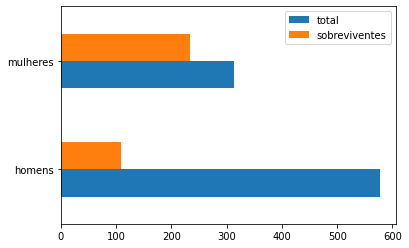

In [60]:
df.plot.barh();

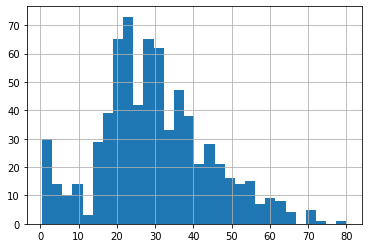

In [61]:
# HISTOGRAMA
dataframe['Age'].hist(bins=30);

In [62]:
sobreviventes = dataframe.query('Survived == 1')['Age']
nao_sobreviventes = dataframe.query('Survived == 0')['Age']

In [63]:
sobreviventes.name='Sobreviventes'
nao_sobreviventes.name='Não Sobreviventes'

In [64]:
sobreviventes

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Sobreviventes, Length: 342, dtype: float64

In [65]:
sobreviventes.dtypes

dtype('float64')

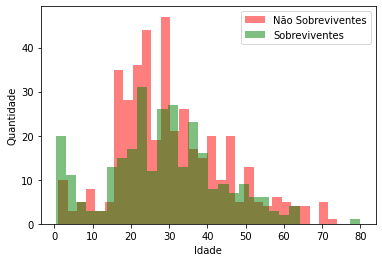

In [66]:
# import matplotlib.pyplot as plt
plt.hist(nao_sobreviventes, alpha=0.5, color='r', bins=30)
plt.hist(sobreviventes, alpha=0.5, color='g', bins=30)
plt.legend(['Não Sobreviventes', 'Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show();

In [67]:
plt.figure = plt.figure

In [68]:
sobreviventes_s = dataframe.query('Survived == 1')['Sex']
nao_sobreviventes_s = dataframe.query('Survived == 0')['Sex']

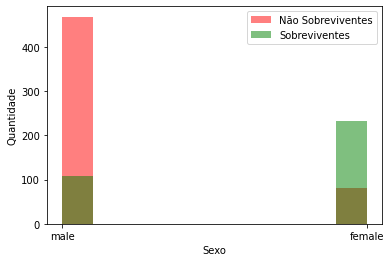

In [113]:
plt.hist(nao_sobreviventes_s, alpha=0.5, color='r', label='Não Sobreviventes')
plt.hist(sobreviventes_s, alpha=0.5, color='g', label='Sobreviventes')
plt.legend()
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show();

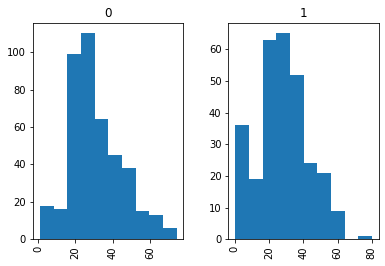

In [70]:
dataframe['Age'].hist(by=dataframe['Survived']);

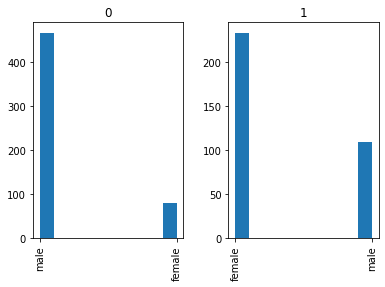

In [71]:
dataframe['Sex'].hist(by=dataframe['Survived']);

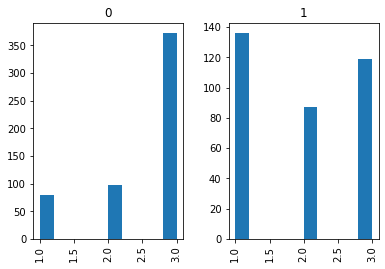

In [72]:
dataframe['Pclass'].hist(by=dataframe['Survived']);

In [73]:
dataframe.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [74]:
dataframe['Sex'] = dataframe['Sex'].map({'male': 0, 'female': 1})

In [75]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [76]:
dataframe.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
dataframe.dropna(subset=['Age'], inplace=True)

In [79]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [80]:
dataframe.shape

(714, 12)

In [81]:
X = dataframe.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked', 'Cabin'])

In [82]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [83]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [84]:
y = dataframe['Survived']

In [85]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
X_train.shape, X_test.shape

((499, 6), (215, 6))

In [89]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
# classificador = RandomForestClassifier()
classificador = DecisionTreeClassifier()

In [91]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
resultado = classificador.predict(X_test)

In [93]:
resultado

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [94]:
y_test

423    0
177    0
305    1
292    0
889    1
      ..
203    0
499    0
628    0
879    1
745    0
Name: Survived, Length: 215, dtype: int64

In [95]:
from sklearn import metrics

In [96]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       125
           1       0.72      0.72      0.72        90

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [97]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       125
           1       0.72      0.72      0.72        90

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [98]:
classificador.feature_importances_

array([0.12986774, 0.28263076, 0.27404328, 0.07007466, 0.01891909,
       0.22446447])

In [99]:
features = pd.Series(classificador.feature_importances_, index=X_train.columns).sort_values(ascending=True)

In [100]:
features

Parch     0.018919
SibSp     0.070075
Pclass    0.129868
Fare      0.224464
Age       0.274043
Sex       0.282631
dtype: float64

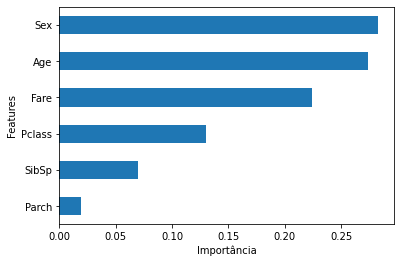

In [101]:
features.plot.barh()
plt.ylabel('Features')
plt.xlabel('Importância')
plt.show();

In [102]:
from sklearn import tree
dot_data = tree.export_graphviz(classificador, max_depth=6, feature_names=X_train.columns, class_names=['0', '1'])
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Sex <= 0.5\\ngini = 0.48\\nsamples = 499\\nvalue = [299, 200]\\nclass = 0"] ;\n1 [label="Age <= 6.5\\ngini = 0.326\\nsamples = 317\\nvalue = [252, 65]\\nclass = 0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="SibSp <= 2.5\\ngini = 0.401\\nsamples = 18\\nvalue = [5, 13]\\nclass = 1"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 13\\nvalue = [0, 13]\\nclass = 1"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = 0"] ;\n2 -> 4 ;\n5 [label="Pclass <= 1.5\\ngini = 0.287\\nsamples = 299\\nvalue = [247, 52]\\nclass = 0"] ;\n1 -> 5 ;\n6 [label="Age <= 53.0\\ngini = 0.473\\nsamples = 65\\nvalue = [40, 25]\\nclass = 0"] ;\n5 -> 6 ;\n7 [label="Age <= 47.5\\ngini = 0.497\\nsamples = 50\\nvalue = [27, 23]\\nclass = 0"] ;\n6 -> 7 ;\n8 [label="Age <= 45.5\\ngini = 0.476\\nsamples = 41\\nvalue = [25, 16]\\nclass = 0"] ;\n7 -> 8 ;\n9 [label="Fare <= 387.665\\ngini = 0.494\\nsamples = 36\\nvalue = [2

In [103]:
import graphviz

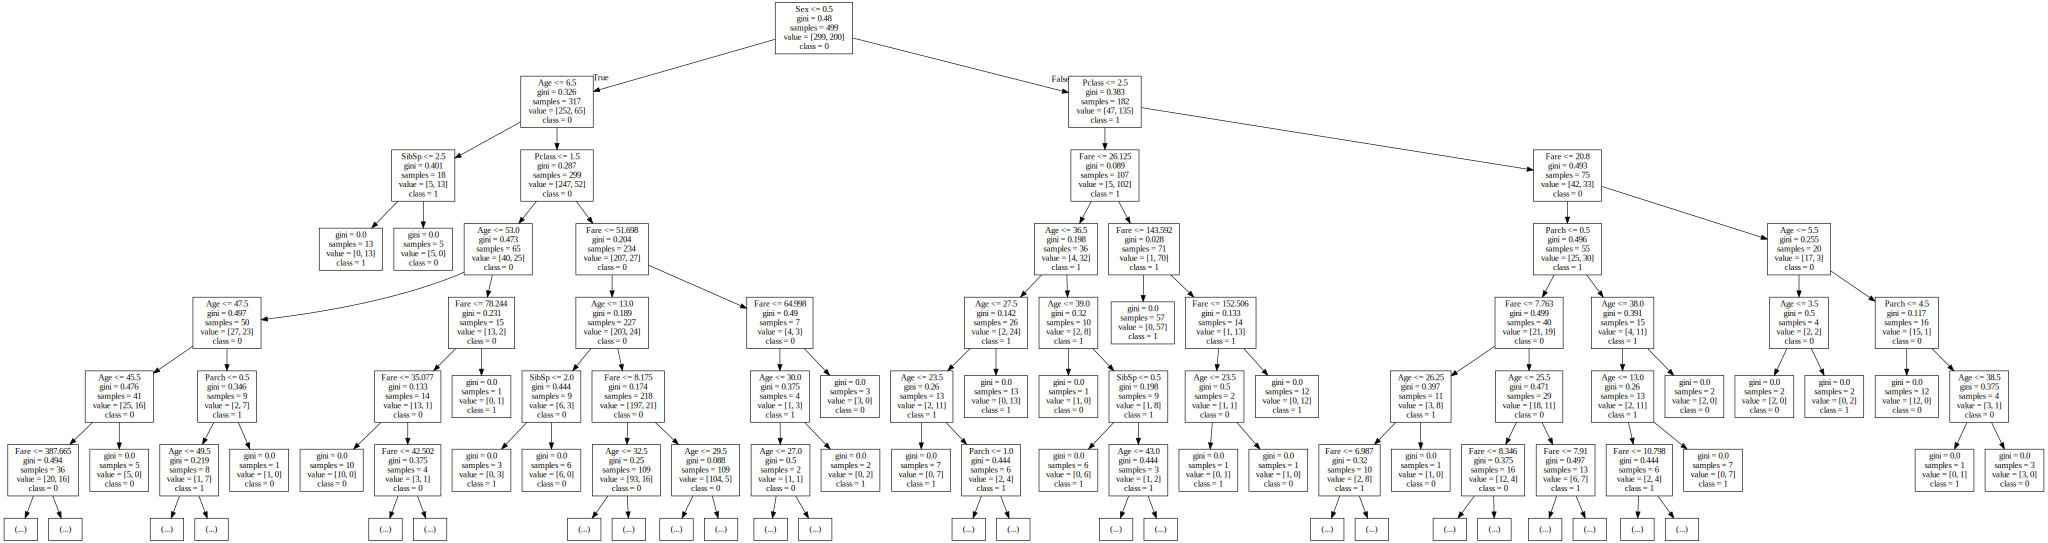

In [104]:
graph = graphviz.Source(dot_data)
graph

In [105]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
200,3,0,28.0,0,0,9.5000
439,2,0,31.0,0,0,10.5000
100,3,1,28.0,0,0,7.8958
117,2,0,29.0,1,0,21.0000
625,1,0,61.0,0,0,32.3208


In [106]:
dataframe['Pclass'].unique()

array([3, 1, 2])

In [107]:
teste = np.array([[1, 1, 43.0, 0, 0, 15]])

In [108]:
teste

array([[ 1.,  1., 43.,  0.,  0., 15.]])

In [109]:
resultado1 = classificador.predict(teste)

In [110]:
resultado1

array([1])

In [111]:
# SALVAR O MODELO E CRIAR A API REST.